In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

dataframe = pd.read_csv("age_height.csv")
dataframe.head()

,Age(year),Height(ft)
0,0.0,0.50
1,1.0,0.75
2,2.0,1.00
3,3.0,NaN
4,3.0,2.00


In [2]:
#handling the missing data

dataframe.isnull().sum()

Age(year)     0
Height(ft)    3
dtype: int64

In [6]:
dataframe.dropna(inplace = True)            #dropping all the rows with NaN values in it
dataframe

,Age(year),Height(ft)
0,0.0,0.50
1,1.0,0.75
2,2.0,1.00
4,3.0,2.00
5,4.0,2.50
6,5.0,3.00
8,6.0,3.50
9,7.0,3.75
10,8.0,4.00
11,10.0,4.20


In [7]:
dataframe.isnull().sum()

Age(year)     0
Height(ft)    0
dtype: int64

In [8]:
# independent data
x = dataframe.iloc[:,0]
print (x)

0      0.0
1      1.0
2      2.0
4      3.0
5      4.0
6      5.0
8      6.0
9      7.0
10     8.0
11    10.0
12    11.0
14    12.0
15    13.0
16    14.0
17    15.0
18    16.0
19    17.0
20    18.0
21    19.0
22    20.0
23    21.0
24    22.0
Name: Age(year), dtype: float64


In [9]:
# dependent data
y = dataframe.iloc[:,1]
print (y)

0     0.50
1     0.75
2     1.00
4     2.00
5     2.50
6     3.00
8     3.50
9     3.75
10    4.00
11    4.20
12    4.50
14    4.75
15    5.00
16    5.10
17    5.30
18    5.50
19    5.60
20    5.70
21    5.80
22    5.90
23    6.00
24    6.00
Name: Height(ft), dtype: float64


In [12]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size =0.8)

x_train

6      5.0
14    12.0
4      3.0
20    18.0
10     8.0
21    19.0
17    15.0
16    14.0
24    22.0
2      2.0
18    16.0
8      6.0
9      7.0
11    10.0
19    17.0
12    11.0
1      1.0
Name: Age(year), dtype: float64

In [13]:
x_test

23    21.0
5      4.0
22    20.0
15    13.0
0      0.0
Name: Age(year), dtype: float64

In [14]:
y_train

6     3.00
14    4.75
4     2.00
20    5.70
10    4.00
21    5.80
17    5.30
16    5.10
24    6.00
2     1.00
18    5.50
8     3.50
9     3.75
11    4.20
19    5.60
12    4.50
1     0.75
Name: Height(ft), dtype: float64

In [15]:
y_test

23    6.0
5     2.5
22    5.9
15    5.0
0     0.5
Name: Height(ft), dtype: float64

In [16]:
type (x_train)

pandas.core.series.Series

In [18]:
print (x_train.ndim)
print (y_train.ndim)
print (y_test.ndim)
print (x_test.ndim)

1
1
1
1


In [20]:
x_train=x_train[:,np.newaxis]      # here I am converting 1-dimentional data to 2 dimentional data
y_train=y_train[:,np.newaxis]

In [21]:
print (x_train.ndim)
print (y_train.ndim)
print (y_test.ndim)
print (x_test.ndim)

2
2
1
1


In [22]:
type(x_train)

numpy.ndarray

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
m = lr.coef_
c = lr.intercept_

In [26]:
print ("linear regression equation is: ")
print ('y = ', m, 'x+ ', c)

linear regression equation is: 
y =  [[0.24442342]] x+  [1.46983784]


In [27]:
# height of a 11 year old
y11 = m*11 +c
print (y11)

[[4.1584955]]


In [28]:
x_test = x_test[:, np.newaxis]           # converting the testing data into 2-dimentional data
y_test = y_test[:, np.newaxis]

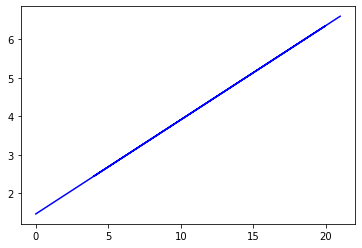

In [30]:
y_pr = lr.predict(x_test)
plt.plot(x_test, y_pr, 'b-')
plt.show()

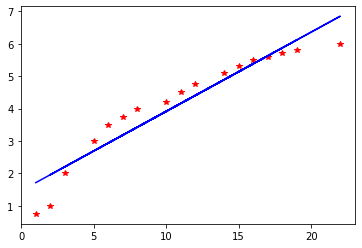

In [32]:
plt.plot(x_train, y_train, 'r*')
plt.plot(x_train, lr.predict(x_train), 'b-')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pr)
print (mse)

0.3282067185780374


In [ ]:
# mse as near as 0 is better